In [13]:
#importing necessary libraray
import numpy as np #used for numerical operation and data manipulation
import pandas as pd #used for data analysis and manipulation
import matplotlib.pyplot as plt #used for data visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #used to handle missing data by filling in missing values.

In [14]:
# Loading dataset 
data = pd.read_csv(r"C:\Users\praba\Desktop\realtor-data.zip.csv")

In [15]:
print(data.columns) #used for display the column names(feature name)

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')


Mean Squared Error: 2462046245876.795


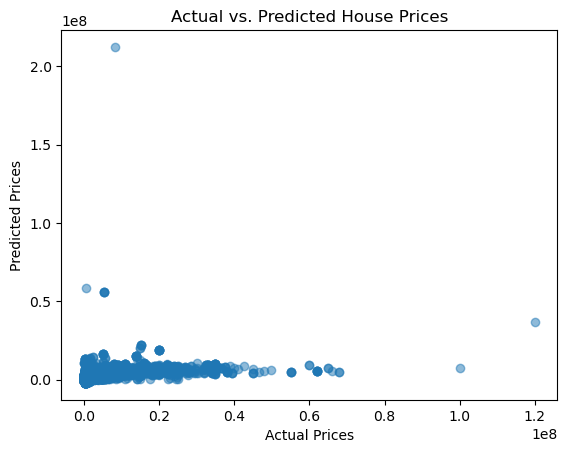

Enter the status: active
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Enter the acre_lot: 1
Enter the city: city
Enter the state: state
Enter the zip code: 12345
Enter the house size: 2000
Enter the previous sold date (YYYY-MM-DD): 2022-01-01
Predicted House Price: 384849.1076285689


In [16]:

X = data[['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']]
y = data['price']

# Define categorical and numerical columns
categorical_cols = ['status', 'city', 'state', 'zip_code', 'prev_sold_date']
numerical_cols = ['bed', 'bath', 'acre_lot', 'house_size']

# Preprocessing: Handle missing values with SimpleImputer
# For numerical columns, fill missing values with the mean
numerical_transformer = SimpleImputer(strategy='mean')

# For categorical columns, fill missing values with the most frequent category
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Impute missing values in the target variable
target_imputer = SimpleImputer(strategy='mean')
y = target_imputer.fit_transform(y.values.reshape(-1, 1))

# Creating a linear regression model as part of a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Creating Scatter plot of Actual vs. Predicted house prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Accepting input for new_data from the console
new_status = input("Enter the status: ")
new_bed = float(input("Enter the number of bedrooms: "))
new_bath = float(input("Enter the number of bathrooms: "))
new_acre_lot = float(input("Enter the acre_lot: "))
new_city = input("Enter the city: ")
new_state = input("Enter the state: ")
new_zip_code = input("Enter the zip code: ")
new_house_size = float(input("Enter the house size: "))
new_prev_sold_date = input("Enter the previous sold date (YYYY-MM-DD): ")

# Creating DataFrame to hold new data
new_data = pd.DataFrame({
    'status': [new_status],
    'bed': [new_bed],
    'bath': [new_bath],
    'acre_lot': [new_acre_lot],
    'city': [new_city],
    'state': [new_state],
    'zip_code': [new_zip_code],
    'house_size': [new_house_size],
    'prev_sold_date': [new_prev_sold_date]
})

# Predicting house price for the new data
predicted_price = model.predict(new_data)
print(f'Predicted House Price: {predicted_price[0][0]}')
